In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
data=pd.read_csv("Data_Train.csv")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')

In [5]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [6]:
#Treating the data_column

data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [7]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [8]:
#Since the maximum number of is 4,there should be maximum 6 cities in any particular toute.we splite the data in route column

data.Route=data.Route.str.split('→')
data.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10683, dtype: object

In [9]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [10]:
# In the similar manner,we split the Dep_time,and create separate for departure hours and minutes
data.Dep_Time=data.Dep_Time.str.split(":")

In [11]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [12]:
data.Arrival_Time=data.Arrival_Time.str.split(' ')

In [13]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [14]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [15]:
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [16]:
# Next, we dividednthe 'Duration' column to 'Travel_hours' and 'Travel_mins' 
data.Duration=data.Duration.str.split(" ")

In [17]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]

data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [18]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [19]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [20]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [21]:
data.Additional_Info.replace('No Info','No info',inplace=True)

In [22]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                    1
City3                 3492
City4                 9117
City5                10637
City6                10682
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date          6348
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins           1032
dtype: int64

In [23]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [24]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)
data.drop(['Time_of_Arrival'], axis=1,inplace=True)

In [25]:
#Checking Null Values
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
City1                   1
City2                   1
City3                3492
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

In [26]:
data['City3'].fillna('None',inplace=True)

In [27]:
data['Arrival_date'].fillna(data['Date'],inplace=True)

In [28]:
data['Travel_Mins'].fillna(0,inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   Date               10683 non-null  object
 7   Month              10683 non-null  object
 8   Year               10683 non-null  object
 9   City1              10682 non-null  object
 10  City2              10682 non-null  object
 11  City3              10683 non-null  object
 12  Dep_Time_Hour      10683 non-null  object
 13  Dep_Time_Mins      10683 non-null  object
 14  Arrival_date       10683 non-null  object
 15  Arrival_Time_Hour  10683 non-null  object
 16  Arrival_Time_Mins  10683 non-null  objec

In [30]:
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype('int64')
data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')
data.Travel_Mins=data.Travel_Mins.astype('int64')

In [31]:
data[data['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,3,2019,BOM,GOI,PNQ,16,50,6,16,55,5m,0


In [32]:
data.drop(index=6474,inplace=True,axis=0)

In [33]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

In [34]:
categorical=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Total_stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Travel_Mins']

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,7,3897,24,3,2019,0,13,29,22,20,22,1,10,2,50
1,1,3,0,1,7,7662,1,5,2019,2,25,1,5,50,1,13,15,7,25
2,4,2,1,1,7,13882,9,6,2019,3,32,4,9,25,10,4,25,19,0
3,3,3,0,0,7,6218,12,5,2019,2,34,3,18,5,12,23,30,5,25
4,3,0,5,0,7,13302,1,3,2019,0,34,8,16,50,1,21,35,4,45


In [37]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,7,3897,24,3,2019,0,13,29,22,20,22,1,10,2,50
1,1,3,0,1,7,7662,1,5,2019,2,25,1,5,50,1,13,15,7,25
2,4,2,1,1,7,13882,9,6,2019,3,32,4,9,25,10,4,25,19,0
3,3,3,0,0,7,6218,12,5,2019,2,34,3,18,5,12,23,30,5,25
4,3,0,5,0,7,13302,1,3,2019,0,34,8,16,50,1,21,35,4,45


In [38]:
data=data[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Additional_Info','City1','Price']]

In [39]:
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Additional_Info,City1,Price
0,3,0,5,24,3,2019,22,20,22,1,10,7,0,3897
1,1,3,0,1,5,2019,5,50,1,13,15,7,2,7662
2,4,2,1,9,6,2019,9,25,10,4,25,7,3,13882
3,3,3,0,12,5,2019,18,5,12,23,30,7,2,6218
4,3,0,5,1,3,2019,16,50,1,21,35,7,0,13302


In [40]:
data.describe()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Additional_Info,City1,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952069,1.435967,13.509081,4.708762,2019.0,12.490358,24.408819,13.908257,13.348530,24.687793,6.582101,2.019753,9086.292735
std,2.352090,1.177110,1.474773,8.479363,1.164294,0.0,5.748819,18.767225,8.466780,6.859398,16.504203,0.838102,1.206543,4610.885695
min,0.000000,0.000000,0.000000,1.000000,3.000000,2019.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,6.000000,3.000000,2019.0,8.000000,5.000000,7.000000,8.000000,10.000000,7.000000,1.000000,5277.000000
50%,4.000000,2.000000,1.000000,12.000000,5.000000,2019.0,11.000000,25.000000,13.000000,14.000000,25.000000,7.000000,2.000000,8372.000000
75%,4.000000,3.000000,2.000000,21.000000,6.000000,2019.0,18.000000,40.000000,21.000000,19.000000,35.000000,7.000000,3.000000,12373.000000
max,11.000000,4.000000,5.000000,27.000000,6.000000,2019.0,23.000000,55.000000,29.000000,23.000000,55.000000,8.000000,5.000000,79512.000000


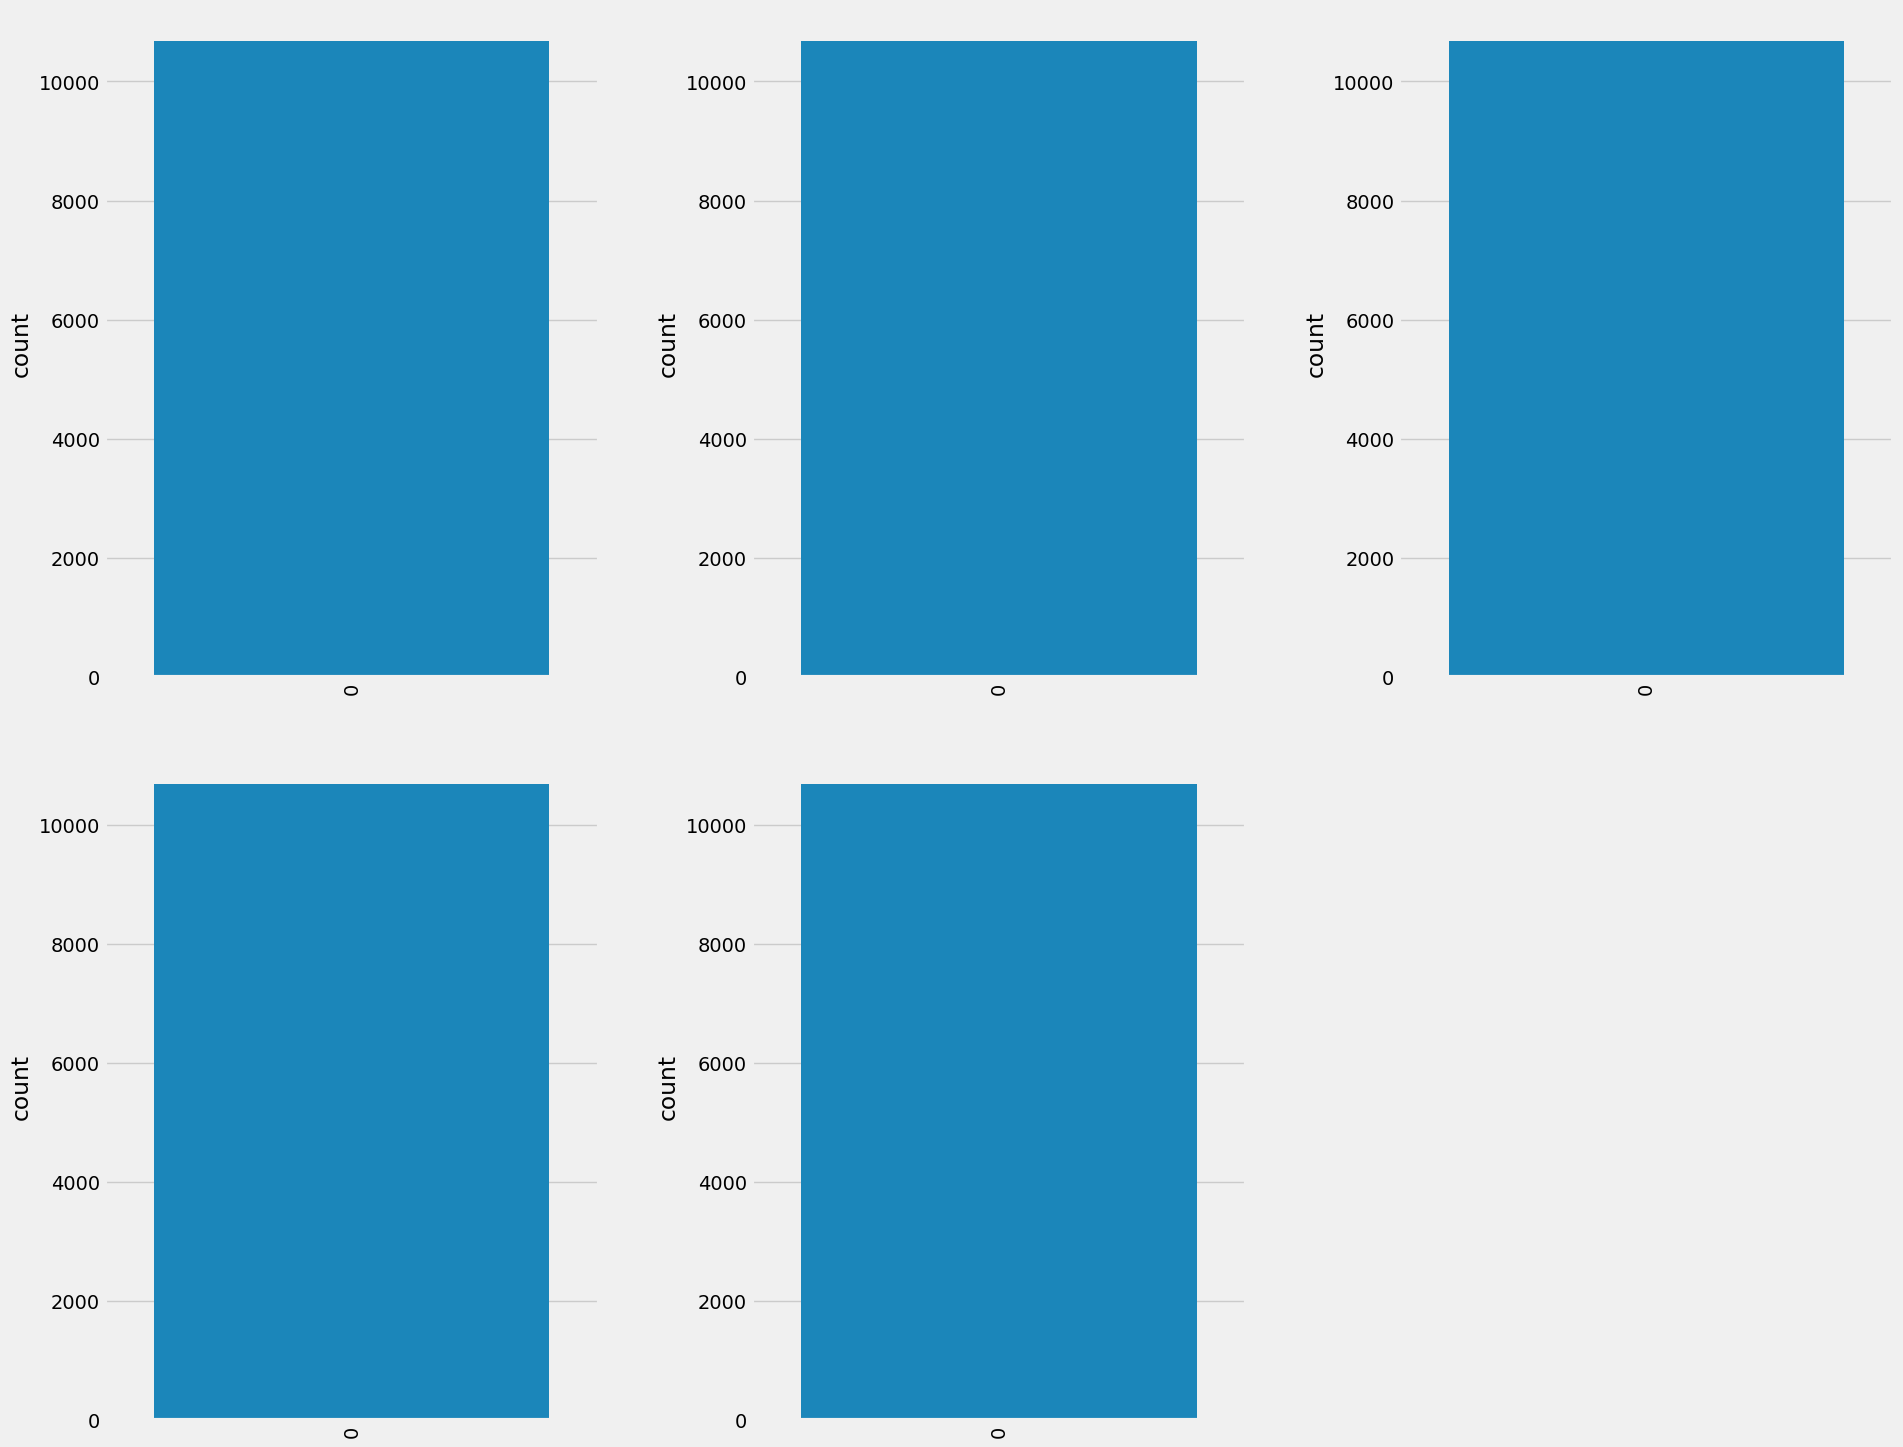

In [41]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1

plt.show()


<Axes: xlabel='Price', ylabel='Density'>

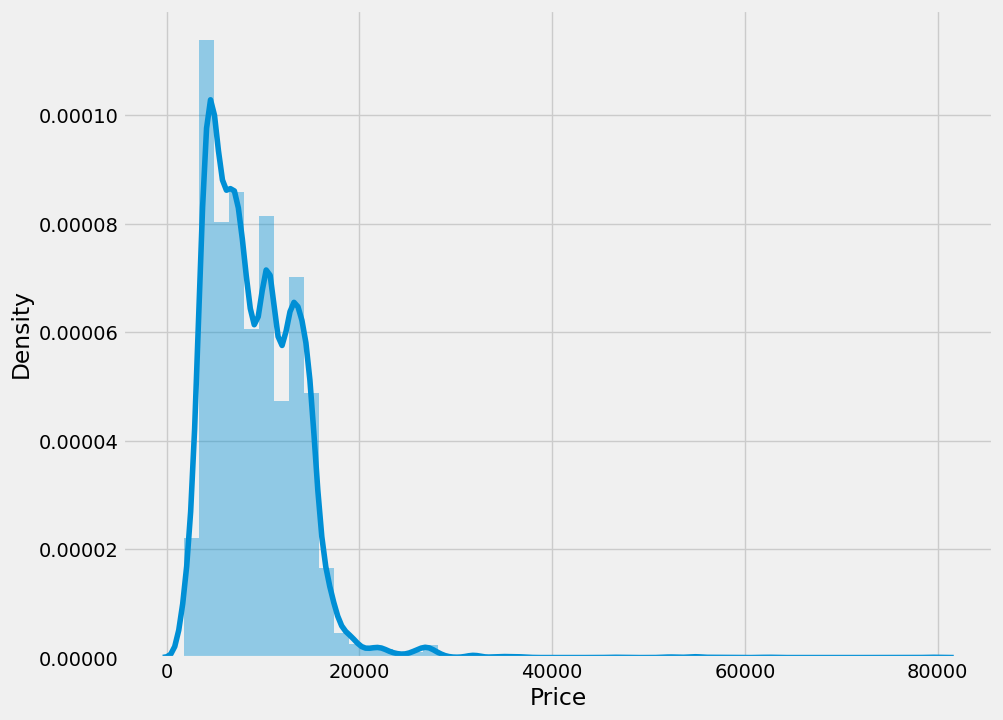

In [42]:
plt.figure(figsize=(10,8))
sns.distplot(data.Price)

<Axes: >

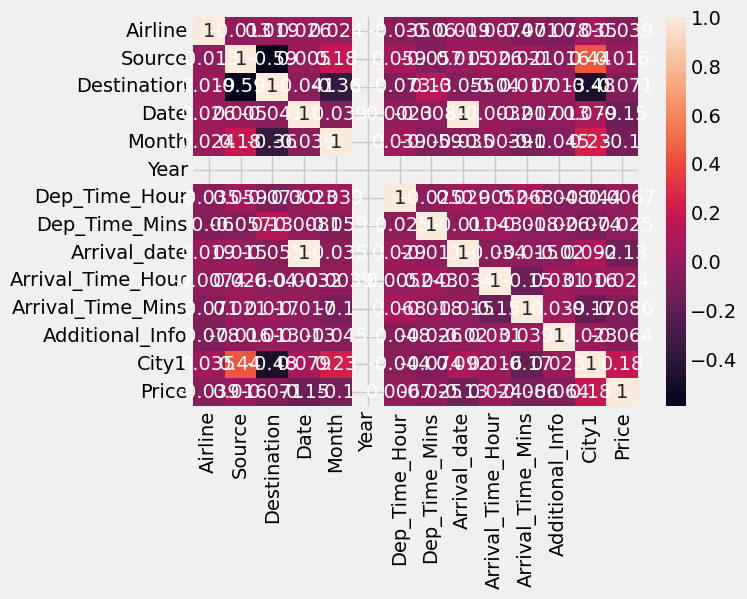

In [43]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

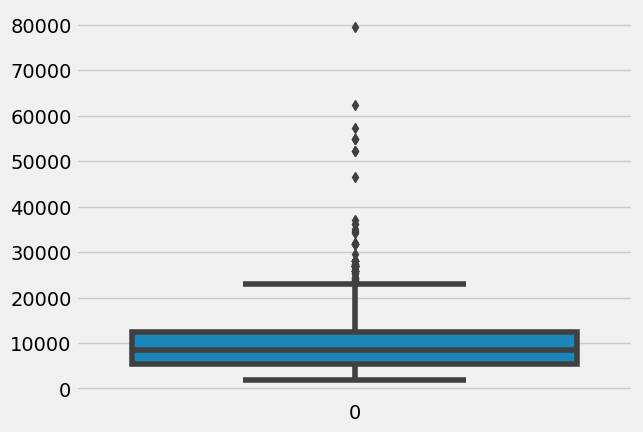

In [44]:
import seaborn as sns
sns.boxplot(data['Price'])

In [45]:
y=data['Price']
x=data.drop(columns=['Price'],axis=1)

In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [47]:
x_scaled=ss.fit_transform(x)

In [48]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Additional_Info,City1
0,-0.410805,-1.658435,2.416778,1.237288,-1.467707,0.0,1.654268,-0.234932,0.955750,-1.800319,-0.889984,0.498649,-1.674078
1,-1.261152,0.890299,-0.973732,-1.475307,0.250153,0.0,-1.303000,1.363674,-1.524648,-0.050813,-0.587017,0.498649,-0.016372
2,0.014369,0.040721,-0.295630,-0.531796,1.109082,0.0,-0.607172,0.031502,-0.461621,-1.362943,0.018918,0.498649,0.812481
3,-0.410805,0.890299,-0.973732,-0.177979,0.250153,0.0,0.958440,-1.034235,-0.225392,1.407109,0.321885,0.498649,-0.016372
4,-0.410805,-1.658435,2.416778,-1.475307,-1.467707,0.0,0.610527,1.363674,-1.524648,1.115525,0.624852,0.498649,-1.674078


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Additional_Info,City1
10005,6,2,1,27,5,2019,8,30,27,19,15,7,3
3684,4,2,1,9,5,2019,11,30,10,12,35,5,3
1034,8,2,1,24,4,2019,15,45,24,22,5,7,3
3909,6,2,1,21,3,2019,12,50,22,1,35,7,3
3088,1,2,1,24,6,2019,17,15,25,19,15,7,3


In [51]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [52]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

for i in [rfr,gb,ad]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.2:
        print(i)

        print("R2 score is",r2_score(y_test,y_pred))
        print("R2 for train data",r2_score(y_train,i.predict(x_train)))
        print("Mean Absolute Error is",mean_absolute_error(y_pred,y_test))
        print("Mean Squre Error is",mean_squared_error(y_pred,y_test))
        print("Root Mean Squre Error is",(mean_squared_error(y_pred,y_test,squared=False)))
        

RandomForestRegressor()
R2 score is 0.9191025274108232
R2 for train data 0.9791395195372534
Mean Absolute Error is 658.1440321471282
Mean Squre Error is 1710093.4474969776
Root Mean Squre Error is 1307.7054131175637
GradientBoostingRegressor()
R2 score is 0.8114053388133947
R2 for train data 0.7785341562134753
Mean Absolute Error is 1419.5999559582283
Mean Squre Error is 3986706.6795270354
Root Mean Squre Error is 1996.6739041533635
AdaBoostRegressor()
R2 score is 0.3666599888728712
R2 for train data 0.37428937690402964
Mean Absolute Error is 2982.138032040049
Mean Squre Error is 13388188.387124836
Root Mean Squre Error is 3658.9873444882037


In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()

for i in [knn,svr,dt]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.2:
        print(i)

        print("R2 score is",r2_score(y_test,y_pred))
        print("R2 for train data",r2_score(y_train,i.predict(x_train)))
        print("Mean Absolute Error is",mean_absolute_error(y_test,y_pred))
        print("Mean Squre Error is",mean_squared_error(y_test,y_pred))
        print("Root Mean Squre Error is",(mean_squared_error(y_test,y_pred,squared=False)))
        

KNeighborsRegressor()
R2 score is 0.5970107565446112
R2 for train data 0.7144370329444705
Mean Absolute Error is 1975.1245671502102
Mean Squre Error is 8518798.456715021
Root Mean Squre Error is 2918.698075634926
SVR()
R2 score is -0.030117400479518608
R2 for train data -0.023060816430354736
Mean Absolute Error is 3629.609978461122
Mean Squre Error is 21775674.32370351
Root Mean Squre Error is 4666.441291145053
DecisionTreeRegressor()
R2 score is 0.8157704229973548
R2 for train data 0.9953699515341272
Mean Absolute Error is 739.5037435657464
Mean Squre Error is 3894433.0692169704
Root Mean Squre Error is 1973.4317999913173


In [54]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() 0.8519384988554385
RandomForestRegressor() 0.863218321361089
RandomForestRegressor() 0.8749669508329351


In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

rf_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [57]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

gb_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [60]:
rfr=RandomForestRegressor(n_estimators=10,max_features='auto',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.9703721595291127
test accuracy 0.8978572492627079


In [61]:
knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.8523608026821045
test accuracy 0.5619471788542862


In [ ]:
rfr=RandomForestRegressor(n_estimators=10,max_features='auto',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.9701130675086691
test accuracy 0.8904620774539906


In [62]:
prices=y_test_pred

In [63]:
price_list=pd.DataFrame({'Price':prices})
price_list

,Price
0,16402.5
1,5208.0
2,8924.5
3,3597.0
4,11048.0
...,...
2132,10497.5
2133,5436.5
2134,6802.0
2135,6386.0


In [64]:
import pickle
pickle.dump(rfr,open('model1.pkl','wb'))